<a href="https://colab.research.google.com/github/Apaulgithub/oibsip_taskno3/blob/main/Car_Price_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
Develop a machine learning model to predict car prices based on various influencing factors

## Code

In [773]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [774]:
# Getting csv file
df = pd.read_csv("car data.csv")

In [775]:
#Data View of cars
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [776]:
#Counting the number of rows and columns
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  301
Number of columns are:  9


In [777]:
#Getting Info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [778]:
#Duplicate Number Of Rows
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 2


In [779]:
# Missing Values/Null Values Count
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [780]:
#Representing columns of dataset
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [781]:
#Describing dataset
df.describe(include= 'all').round(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.00,301.00,301.00,301.00,301,301,301,301.00
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.63,4.66,7.63,36947.21,NaN,NaN,NaN,0.04
std,NaN,2.89,5.08,8.64,38886.88,NaN,NaN,NaN,0.25
min,NaN,2003.00,0.10,0.32,500.00,NaN,NaN,NaN,0.00
25%,NaN,2012.00,0.90,1.20,15000.00,NaN,NaN,NaN,0.00
50%,NaN,2014.00,3.60,6.40,32000.00,NaN,NaN,NaN,0.00
75%,NaN,2016.00,6.00,9.90,48767.00,NaN,NaN,NaN,0.00


In [782]:
# Check Unique Values
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Car_Name is 98
No. of unique values in Year is 16
No. of unique values in Selling_Price is 156
No. of unique values in Present_Price is 148
No. of unique values in Driven_kms is 206
No. of unique values in Fuel_Type is 3
No. of unique values in Selling_type is 2
No. of unique values in Transmission is 2
No. of unique values in Owner is 3


In [783]:
#Adding current year
df['Current Year'] = 2023

# Calculating the age of the vehicles
df['no_year'] = df['Current Year'] - df['Year']

In [784]:
# Removing the Current Year
df.drop(['Current Year'], axis=1, inplace=True)

In [785]:
#Updated Data
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,no_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [786]:
#Creating dependent_variable
dependent_variable = ['Selling_Price']

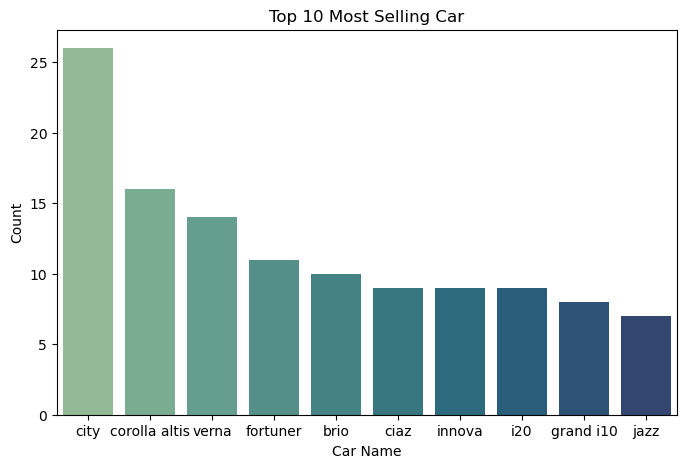

In [787]:
#Count plot visualization code for top 10 most selling car

top10 = df['Car_Name'].value_counts()[:10]

# Create a count plot for top 10 cars
plt.figure(figsize=(8, 5))
sns.countplot(x='Car_Name', data=df, order=top10.index, palette='crest')

# Set labels and title for the plot
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.title('Top 10 Most Selling Car')

# Display the plot
plt.show()

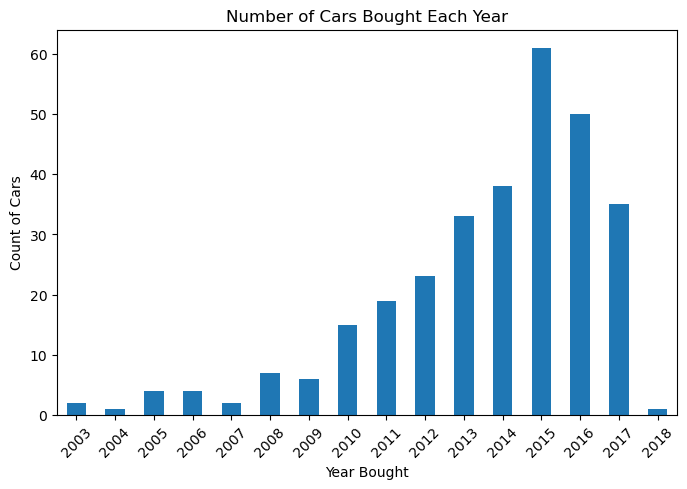

In [788]:
# Bar plot visualization code for Number of Cars Bought Each Year
# Set the figure size for the plot
plt.figure(figsize=(8, 5))

yearly_counts = df.groupby('Year').count()['Car_Name']
yearly_counts.plot(kind='bar')

plt.xticks(rotation=45)


plt.xlabel('Year Bought')
plt.ylabel('Count of Cars')
plt.title('Number of Cars Bought Each Year')

# Display the plot
plt.show()

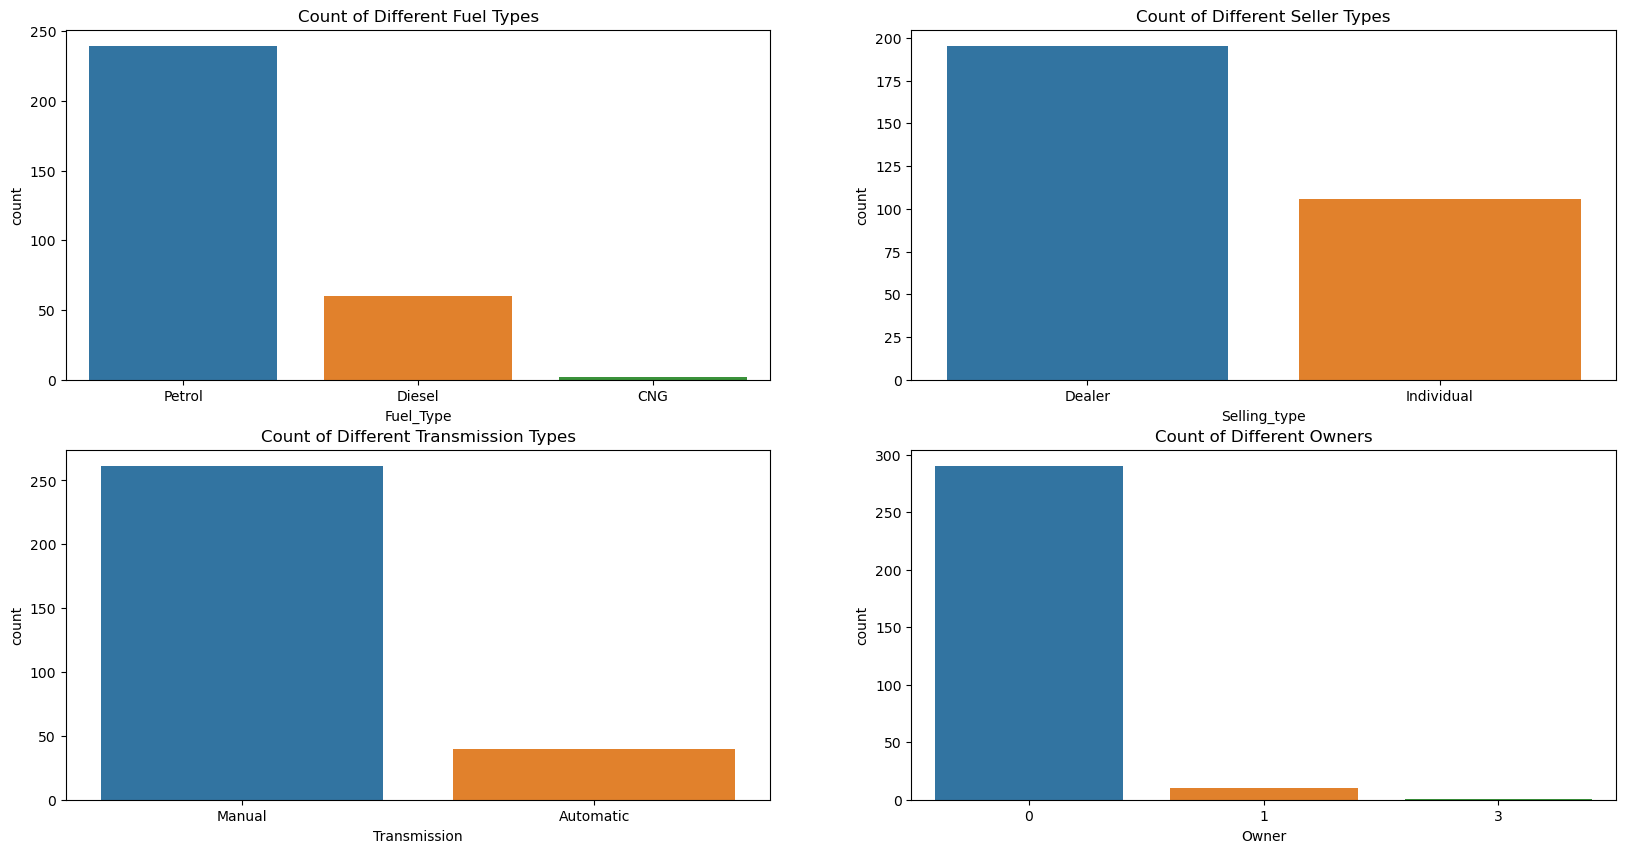

In [789]:
# Count plot visualization code for Categorical Variable
# Create a 2x2 subplot
plt.figure(figsize=(20,10))

# Subplot 1
plt.subplot(2,2,1)
sns.countplot(data=df, x = 'Fuel_Type')
plt.title("Count of Different Fuel Types")

# Subplot 2
plt.subplot(2,2,2)
sns.countplot(data=df, x = 'Selling_type')
plt.title("Count of Different Seller Types")

# Subplot 3
plt.subplot(2,2,3)
sns.countplot(data=df, x = 'Transmission')
plt.title("Count of Different Transmission Types")

# Subplot 4
plt.subplot(2,2,4)
sns.countplot(data=df, x = 'Owner')
plt.title("Count of Different Owners")

# Display the plot
plt.show()

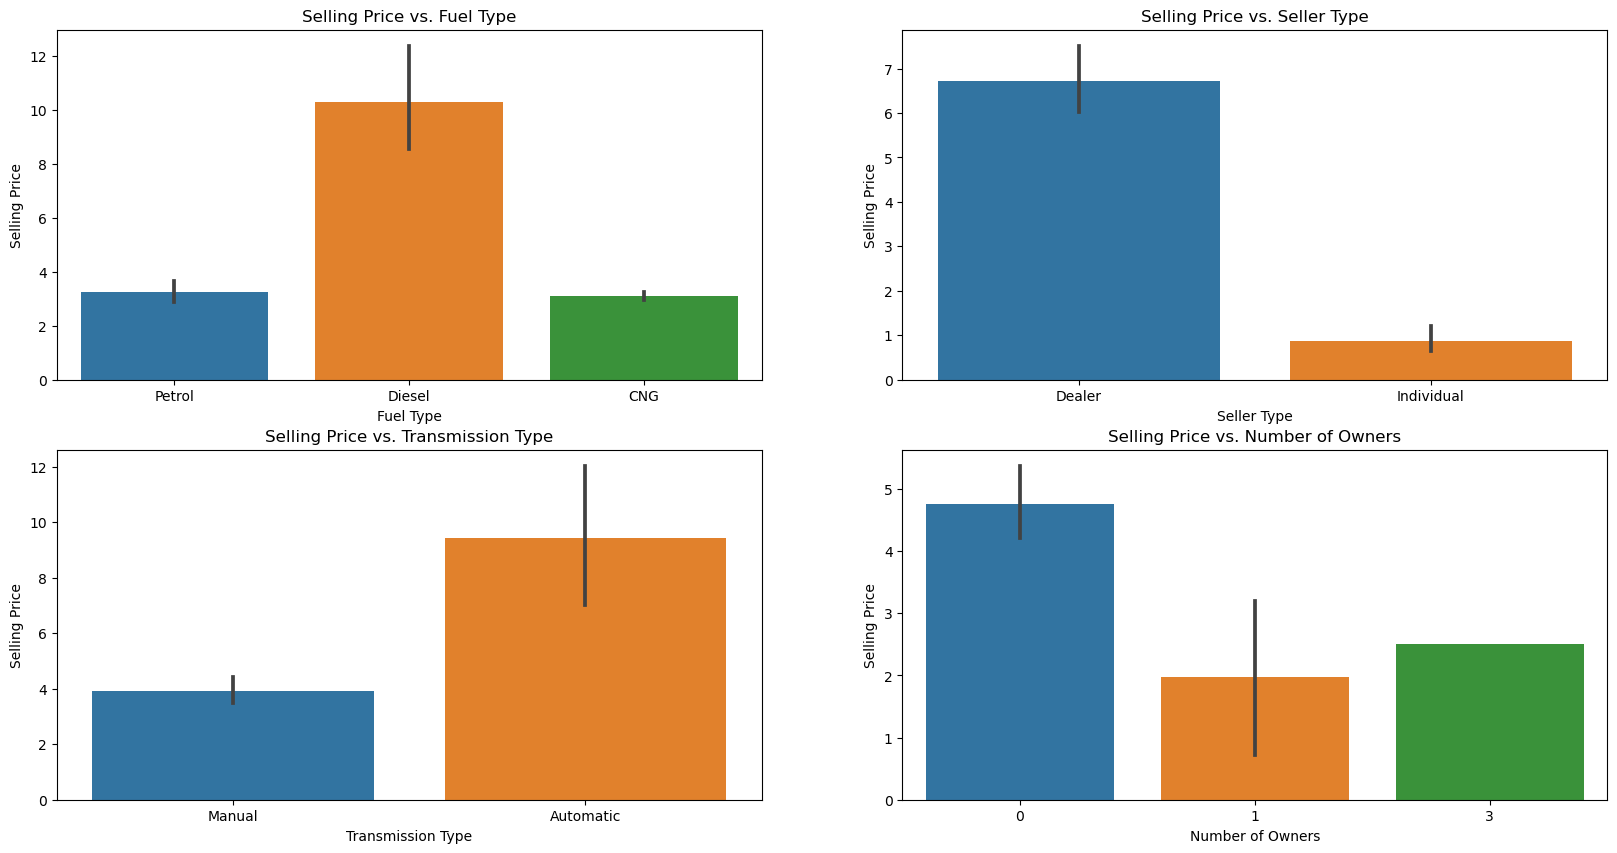

In [790]:
#Barplot visualization code for categorical variable vs target variable

plt.figure(figsize=(20,10))

# Subplot 1
plt.subplot(2,2,1)
sns.barplot(data=df, x='Fuel_Type', y='Selling_Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Fuel Type')

# Subplot 2
plt.subplot(2,2,2)
sns.barplot(data=df, x='Selling_type', y='Selling_Price')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Seller Type')

# Subplot 3
plt.subplot(2,2,3)
sns.barplot(data=df, x='Transmission', y='Selling_Price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Transmission Type')

# Subplot 4
plt.subplot(2,2,4)
sns.barplot(data=df, x='Owner', y='Selling_Price')
plt.xlabel('Number of Owners')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Number of Owners')

# Display the plot
plt.show()

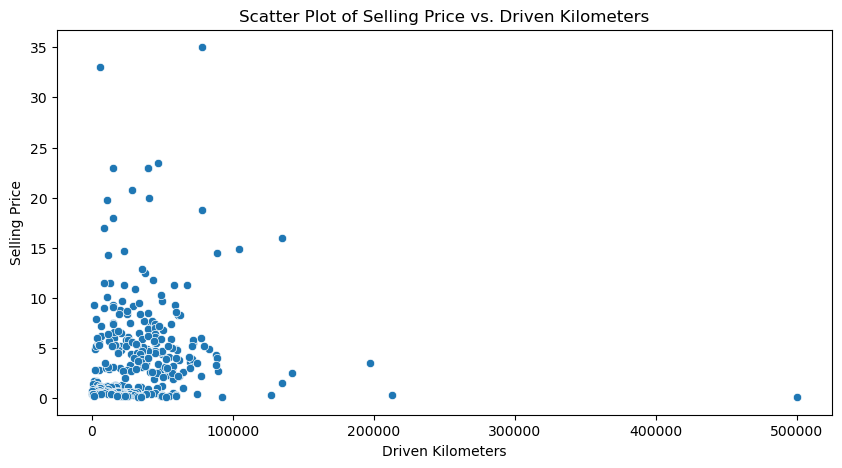

In [791]:
# Scatter plot for Driven Kilometers vs Selling Price

plt.figure(figsize=(10,5))


sns.scatterplot(data=df, x='Driven_kms', y='Selling_Price')

# Set labels for the x and y axes
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')

plt.title('Scatter Plot of Selling Price vs. Driven Kilometers')

# Display the plot
plt.show()

In [792]:
# Handling Outliers & Outlier treatments

q1, q3, median = df.Selling_Price.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['Selling_Price'] = np.where(df['Selling_Price'] > upper_limit, median,np.where(df['Selling_Price'] < lower_limit,median,df['Selling_Price']))

# Removing outliers
for col in ['Present_Price','Driven_kms','Owner','no_year']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

In [793]:
#Remove the car name
df.drop(['Car_Name'], axis=1, inplace=True)

In [794]:
#Setting into Numerical Format
df = pd.get_dummies(df)

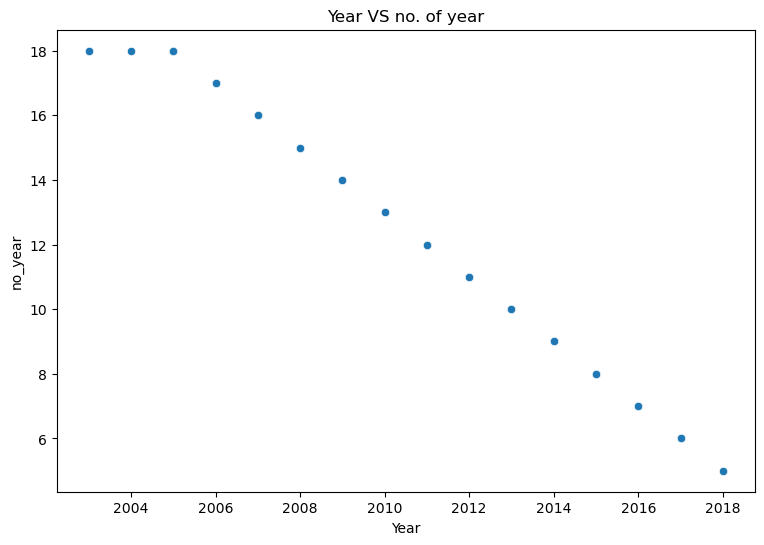

In [795]:
#Graph of Year vs No of Year
plt.figure(figsize=(9,6))
sns.scatterplot(x='Year',y='no_year',data=df)
plt.xlabel('Year')
plt.ylabel('no_year')
plt.title('Year VS no. of year')
plt.show()

In [796]:
# Correlation
df[['Year','no_year']].corr()

,Year,no_year
Year,1.000000,-0.998376
no_year,-0.998376,1.000000


In [797]:
# Removing Year Calculation
df.drop(['Year'], axis=1, inplace=True)

In [798]:
# Select your features
features = [i for i in df.columns if i not in ['Selling_Price']]
features

['Present_Price',
 'Driven_kms',
 'Owner',
 'no_year',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

In [799]:
# Delete multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [800]:
continuous_variables = ['Present_Price', 'Driven_kms', 'Owner', 'no_year']

In [801]:
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [802]:
continuous_feature_df

,Present_Price,Driven_kms,Owner,no_year
0,5.59,27000.0,0.0,9.0
1,9.54,43000.0,0.0,10.0
2,9.85,6900.0,0.0,6.0
3,4.15,5200.0,0.0,12.0
4,6.87,42450.0,0.0,9.0
...,...,...,...,...
296,11.60,33988.0,0.0,7.0
297,5.90,60000.0,0.0,8.0
298,11.00,87934.0,0.0,14.0
299,12.50,9000.0,0.0,6.0


In [803]:
calc_vif(df[[i for i in continuous_feature_df]])

,variables,VIF
0,Present_Price,2.153995
1,Driven_kms,4.818128
2,Owner,1.061741
3,no_year,4.530533


In [804]:
#Final data for modeling
df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000.0,0.0,9.0,False,False,True,True,False,False,True
1,4.75,9.54,43000.0,0.0,10.0,False,True,False,True,False,False,True
2,7.25,9.85,6900.0,0.0,6.0,False,False,True,True,False,False,True
3,2.85,4.15,5200.0,0.0,12.0,False,False,True,True,False,False,True
4,4.60,6.87,42450.0,0.0,9.0,False,True,False,True,False,False,True


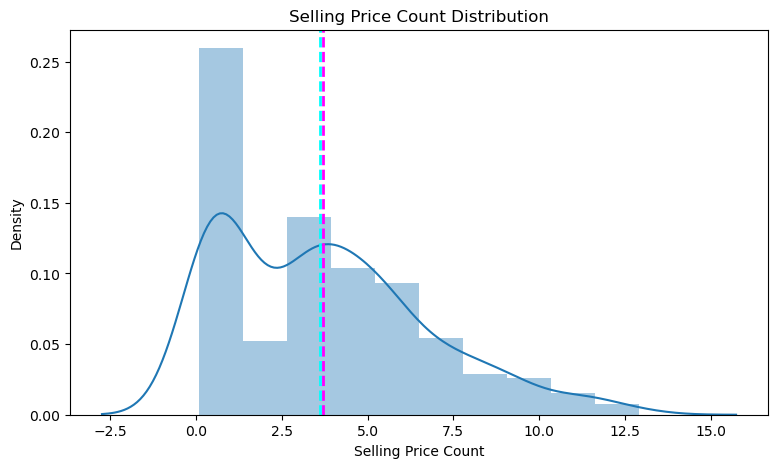

In [805]:
# Transform the data
# Visualizing the distribution of the dependent variable - Selling Price
plt.figure(figsize=(9,5))
sns.distplot(df[dependent_variable])
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [806]:
#Skew of the dependent variable
df[dependent_variable].skew()

Selling_Price    0.757016
dtype: float64

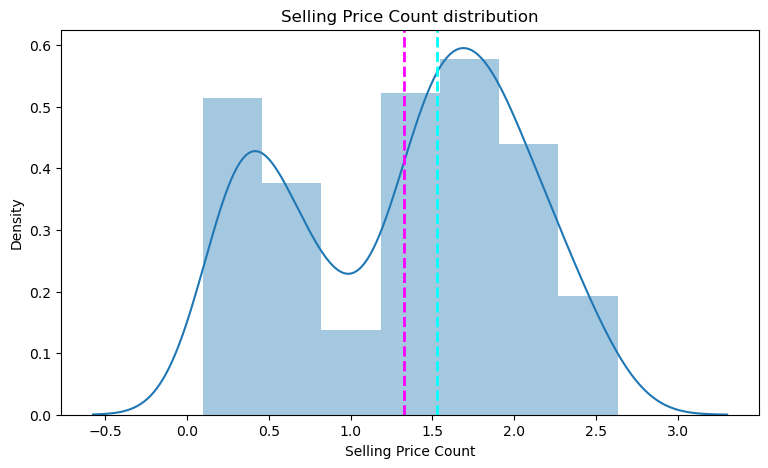

In [807]:
#Visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(9,5))
sns.distplot(np.log1p(df[dependent_variable]))
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count distribution')
plt.axvline(np.log1p(df['Selling_Price']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(df['Selling_Price']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [808]:
#Skew of the dependent variable after log transformation
np.log1p(df[dependent_variable]).skew()

Selling_Price   -0.222356
dtype: float64

In [809]:
# Defining dependent and independent variables
X = df.drop('Selling_Price',axis=1)
y = np.log1p(df[dependent_variable])

In [810]:
features


['Present_Price',
 'Driven_kms',
 'Owner',
 'no_year',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

In [811]:
features = [i for i in df.columns if i not in ['Selling_Price']]

In [812]:
#Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

In [813]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [814]:
#Checking the train distribution for dependent variable
y_train.value_counts()

Selling_Price
1.526056         11
0.470004          6
0.371564          6
0.182322          5
1.609438          5
                 ..
1.294727          1
1.266948          1
1.208960          1
1.131402          1
2.602690          1
Name: count, Length: 116, dtype: int64

In [815]:
#Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 5 important features, and returns a list of the model scores'''

  #Apply inverse log transformation to y_test and y_pred as we have used log transformation
  y_t = np.exp(y_test)
  y_p = np.exp(y_pred)
  y_train2 = np.exp(y_train)
  y_train_pred = np.exp(model.predict(X_train))

  #Calculating Evaluation Matrix
  mse = mean_squared_error(y_t,y_p)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_t,y_p)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  #Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  #Plot actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Selling Price', fontsize=12)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  #Feature importances
  feat = pd.Series(importance, index=features)
  plt.figure(figsize=(7,4))
  plt.title('Feature Importances (top 5) for '+str(model), fontsize = 12)
  plt.xlabel('Relative Importance')
  feat.nlargest(5).plot(kind='barh')


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [816]:

score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

### ML Model: Lasso Regression

In [817]:
#Import the Lasso Regression class
lasso = Lasso()

#Fit the lasso regression model to the training data
lasso.fit(X_train, y_train)

#Predict on the model
y_pred_lasso1 = lasso.predict(X_test)

MSE : 9.807266785467892
RMSE : 3.1316555981569705
MAE : 2.513357873886036
Train R2 : -0.10059179585999933
Test R2 : -0.19372867167662267
Adjusted R2 :  -0.35994405634045634


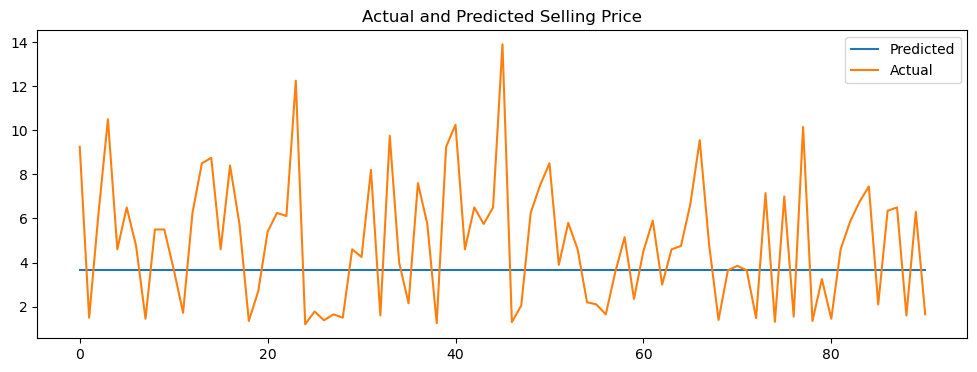

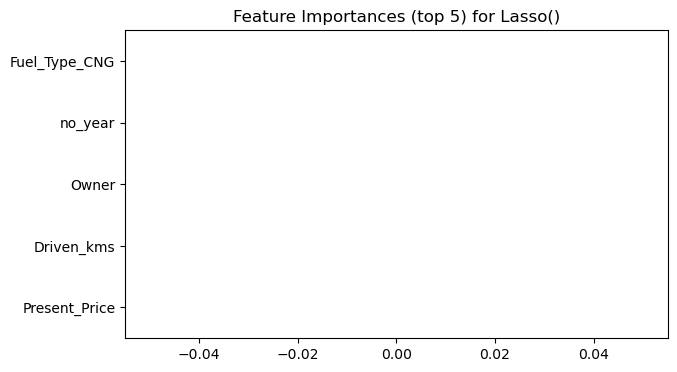

In [818]:
#Visualizing evaluation Metric Score chart
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [819]:

score

,Lasso regression
MSE,9.807267
RMSE,3.131656
MAE,2.513358
Train R2,-0.100592
Test R2,-0.193729
Adjusted R2,-0.359944


In [820]:
#Define Lasso Method
lasso = Lasso()

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

#Fitting model
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [821]:
#Getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The optimum alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.09201807273836611


In [822]:

lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

#Fit the lasso regression model
lasso.fit(X_train, y_train)

#Predict the model
y_pred_lassocv = lasso.predict(X_test)

MSE : 4.143092228273676
RMSE : 2.0354587267428625
MAE : 1.2972252346842905
Train R2 : 0.6362928099908935
Test R2 : 0.49570781641024564
Adjusted R2 :  0.4254899174293937


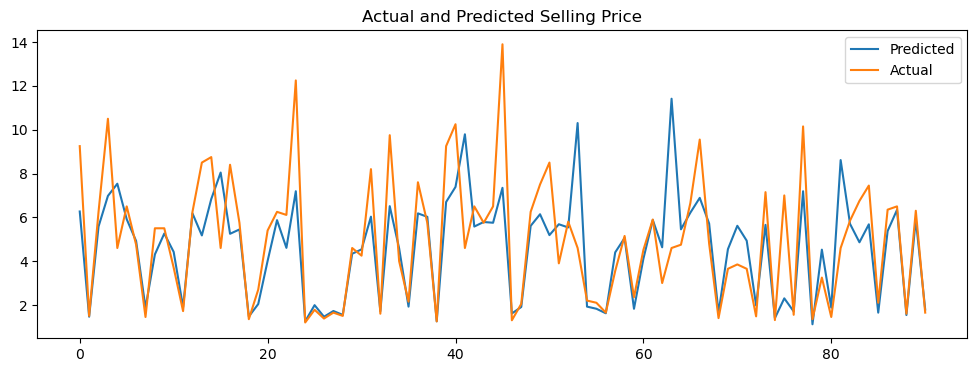

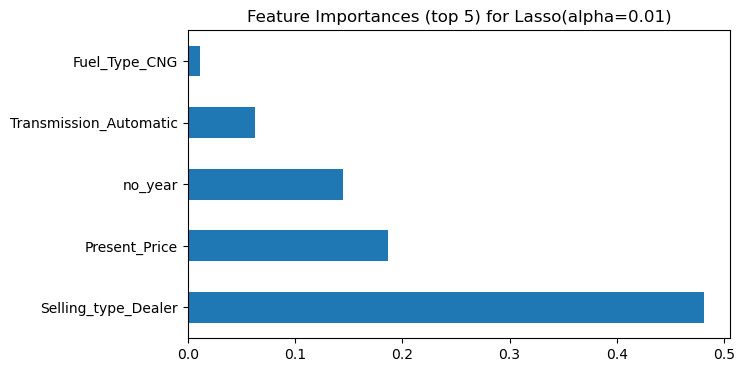

In [823]:
#Evaluating matrices
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2

In [824]:
# Updated Evaluation Metric Score chart
score


,Lasso regression,Lasso with alpha = 0.01
MSE,9.807267,4.143092
RMSE,3.131656,2.035459
MAE,2.513358,1.297225
Train R2,-0.100592,0.636293
Test R2,-0.193729,0.495708
Adjusted R2,-0.359944,0.425490


## Conclusion
This project explores the automotive industry's intricate dynamics, aiming to predict car prices with machine learning. By analyzing various factors such as fuel type, seller type, and transmission, we uncover valuable insights and select a robust model for accurate price prediction.